In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [9]:
df_history = pd.read_csv('TCS_stock_history.csv')
print("\n✅ Loaded: TCS_stock_history.csv\n")
df_history.head()


✅ Loaded: TCS_stock_history.csv



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [10]:
df_action = pd.read_csv('TCS_stock_action.csv')
print("\n✅ Loaded: TCS_stock_action.csv\n")
df_action.head()


✅ Loaded: TCS_stock_action.csv



,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0


In [11]:
df_info = pd.read_csv('TCS_stock_info.csv')
print("\n✅ Loaded: TCS_stock_info.csv\n")
df_info.head()


✅ Loaded: TCS_stock_info.csv



,zip,400001
0,sector,Technology
1,fullTimeEmployees,509058
2,longBusinessSummary,Tata Consultancy Services Limited provides inf...
3,city,Mumbai
4,phone,91 22 6778 9999


In [12]:
df = df_history.copy()

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

print("\n✅ Info of df:\n")
df.info()


✅ Info of df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB


In [14]:
print("\n✅ Describe:\n")
df.describe()


✅ Describe:



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


In [15]:
cor = df.corr()
print("\n✅ Correlation Matrix:\n")
print(cor)


✅ Correlation Matrix:

                  Date      Open      High       Low     Close    Volume  \
Date          1.000000  0.899114  0.899354  0.898962  0.899214 -0.177351   
Open          0.899114  1.000000  0.999888  0.999892  0.999787 -0.153362   
High          0.899354  0.999888  1.000000  0.999867  0.999914 -0.150918   
Low           0.898962  0.999892  0.999867  1.000000  0.999901 -0.154962   
Close         0.899214  0.999787  0.999914  0.999901  1.000000 -0.152844   
Volume       -0.177351 -0.153362 -0.150918 -0.154962 -0.152844  1.000000   
Dividends     0.062321  0.059743  0.060044  0.059916  0.060179 -0.010332   
Stock Splits -0.005701 -0.006715 -0.006597 -0.006622 -0.006635  0.004752   

              Dividends  Stock Splits  
Date           0.062321     -0.005701  
Open           0.059743     -0.006715  
High           0.060044     -0.006597  
Low            0.059916     -0.006622  
Close          0.060179     -0.006635  
Volume        -0.010332      0.004752  
Dividends  

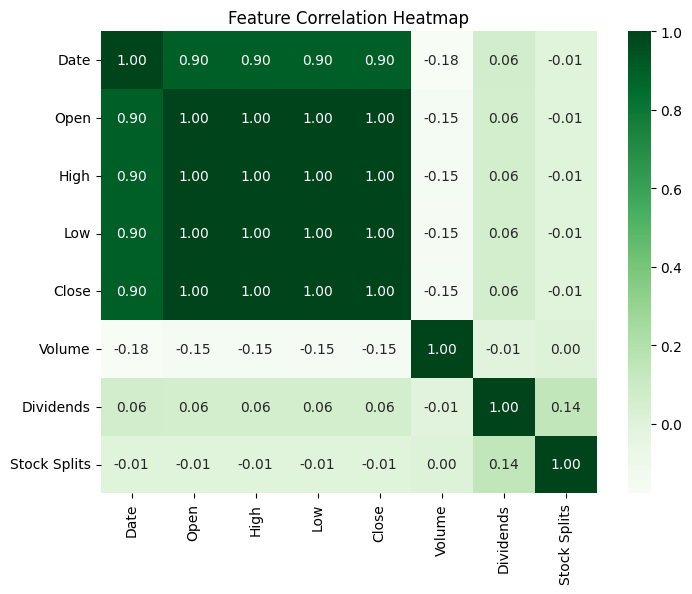

In [16]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap="Greens", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# Correlation with Close price
cor_close = df.corr()['Close'].sort_values(ascending=False)
print("\n✅ Correlation with Close Price:\n", cor_close)


✅ Correlation with Close Price:
 Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


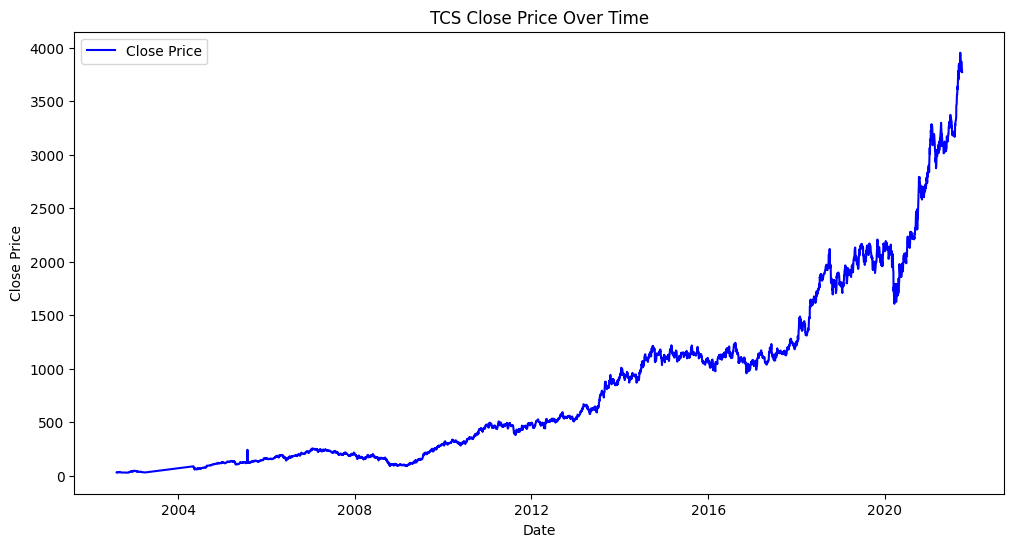

In [18]:
# Close Price Trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='b', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Close Price Over Time')
plt.legend()
plt.show()

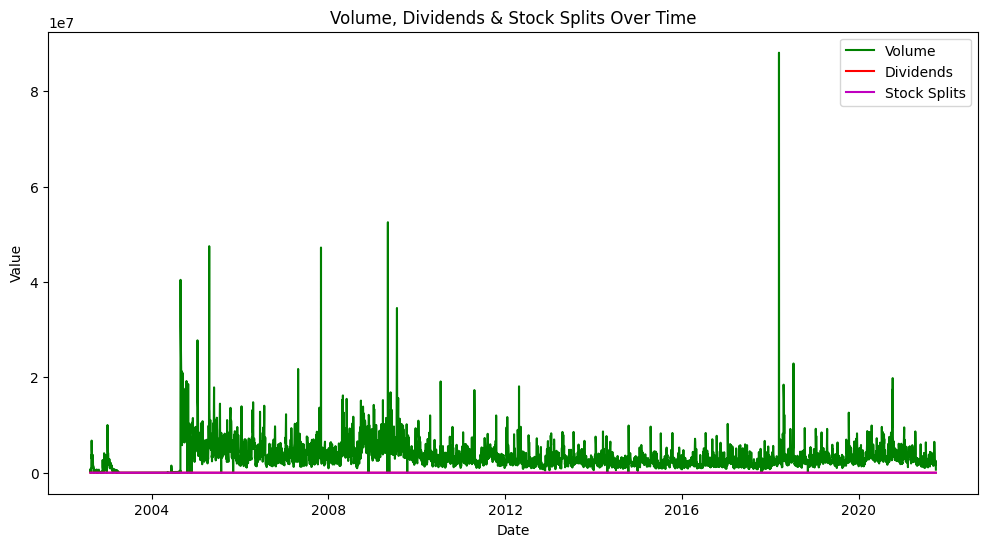

In [19]:
# Volume, Dividends, Stock Splits
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='g', label='Volume')
plt.plot(df['Date'], df['Dividends'], color='r', label='Dividends')
plt.plot(df['Date'], df['Stock Splits'], color='m', label='Stock Splits')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends & Stock Splits Over Time')
plt.legend()
plt.show()

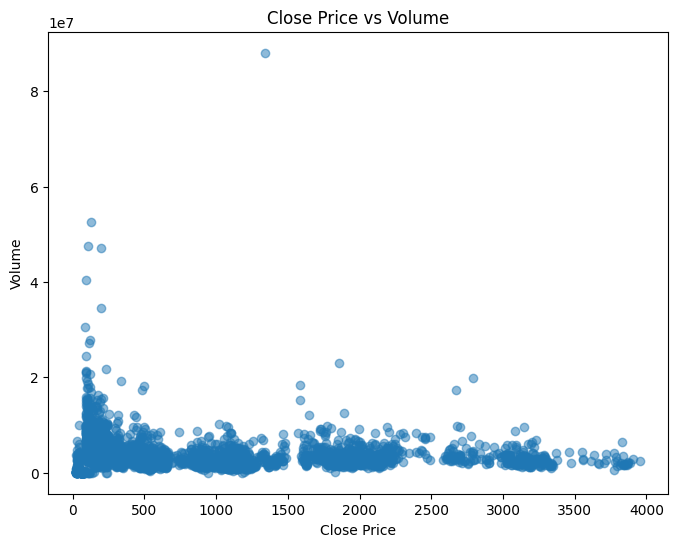

In [20]:
# Close vs Volume
plt.figure(figsize=(8, 6))
plt.scatter(df['Close'], df['Volume'], alpha=0.5)
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs Volume')
plt.show()

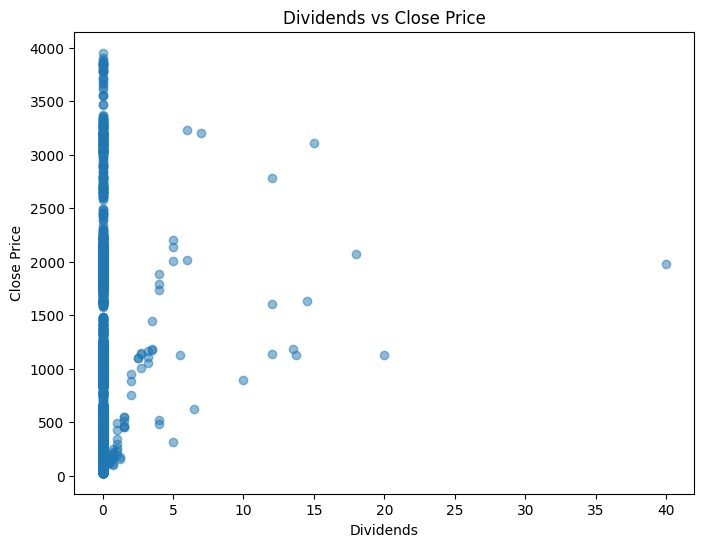

In [21]:
# Dividends vs Close
plt.figure(figsize=(8, 6))
plt.scatter(df['Dividends'], df['Close'], alpha=0.5)
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs Close Price')
plt.show()

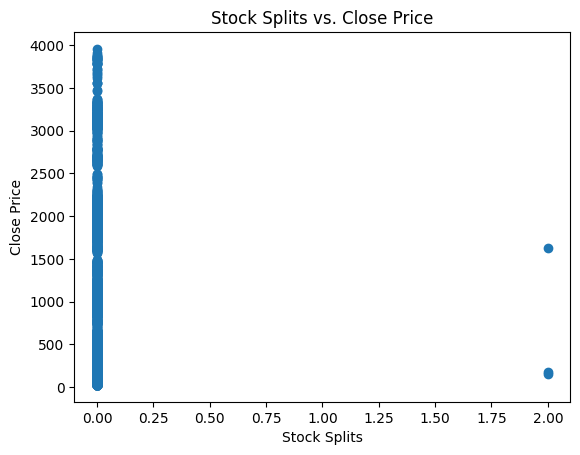

In [23]:
# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

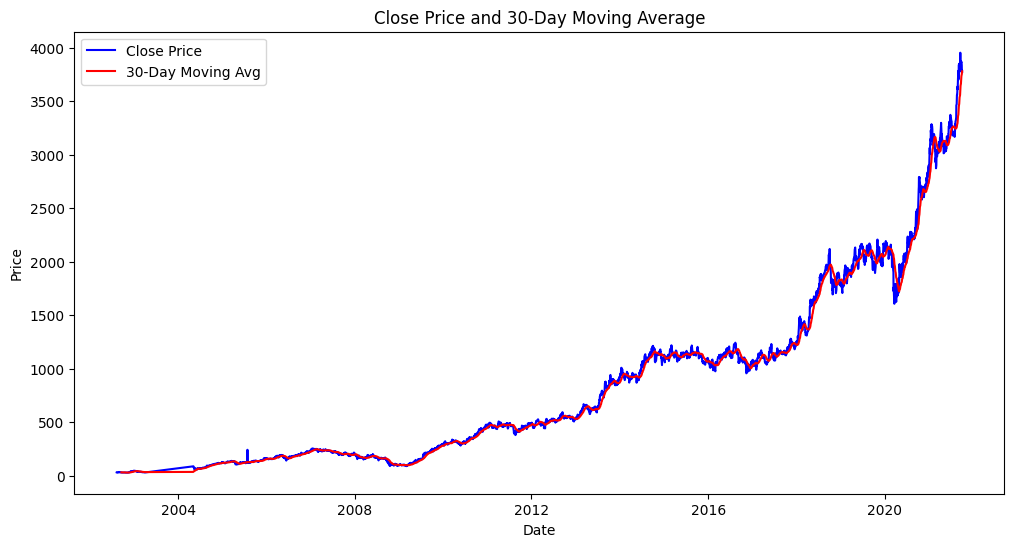

In [27]:
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()
 # Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',color='b')
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

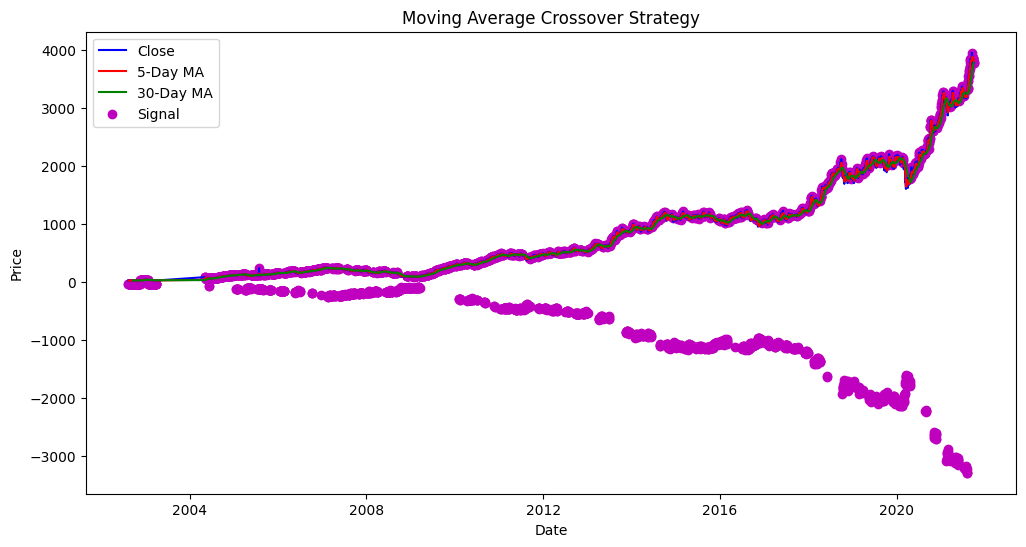

In [24]:
df['MA30'] = df['Close'].rolling(window=30).mean()
df['MA5'] = df['Close'].rolling(window=5).mean()

# Signal: 1 = Buy, -1 = Sell
df['Signal'] = np.where(df['MA5'] > df['MA30'], 1, -1)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close', color='b')
plt.plot(df['Date'], df['MA5'], label='5-Day MA', color='r')
plt.plot(df['Date'], df['MA30'], label='30-Day MA', color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'], label='Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

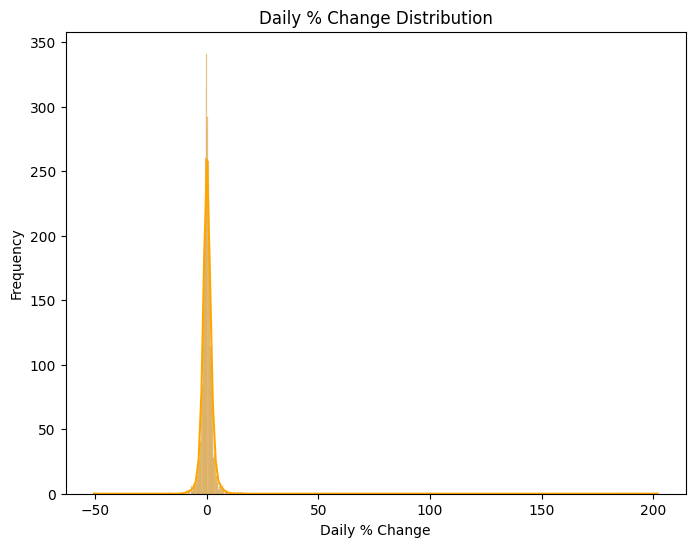

In [25]:
# Daily Percentage Change
df['Daily_Change_%'] = df['Close'].pct_change() * 100

plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Change_%'].dropna(), kde=True, color='orange')
plt.title('Daily % Change Distribution')
plt.xlabel('Daily % Change')
plt.ylabel('Frequency')
plt.show()

In [28]:
df['Prev_Close'] = df['Close'].shift(1)
df['7_MA'] = df['Close'].rolling(window=7).mean()

df.dropna(inplace=True)

print("\n✅ Feature engineering complete, shape:", df.shape)


✅ Feature engineering complete, shape: (4434, 15)


In [29]:
# Prepare data
X_all = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_all)

X_train = X_scaled[:-1].reshape(-1, 1, 1)
y_train = X_scaled[1:]

# Test data: last 20%
test_size = int(len(df) * 0.2)
test_df = df[-test_size:]

X_test = test_df['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

# Build LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
epochs = 30
batch_size = 15
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)

# Predict
lstm_pred_scaled = model.predict(X_test_lstm).flatten().reshape(-1, 1)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

# MAE
mae = mean_absolute_error(test_df['Close'], lstm_pred)
print("\n✅ LSTM Mean Absolute Error:", mae)

100%|██████████| 30/30 [00:20<00:00,  1.48it/s]


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

✅ LSTM Mean Absolute Error: 69.55591509196881


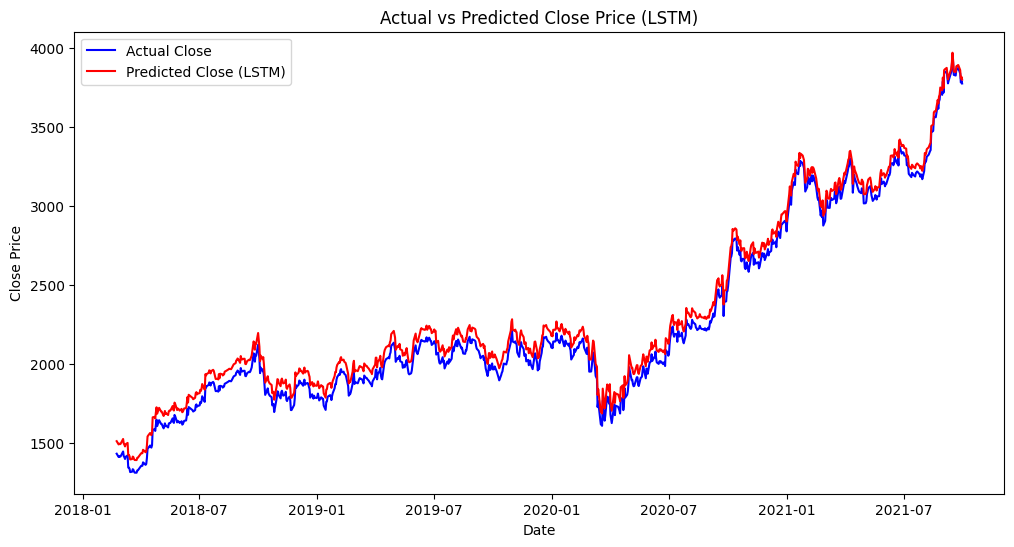

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(test_df['Date'], test_df['Close'], label='Actual Close', color='b')
plt.plot(test_df['Date'], lstm_pred, label='Predicted Close (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price (LSTM)')
plt.legend()
plt.show()

In [31]:
pred_df = pd.DataFrame({
    'Date': test_df['Date'].values,
    'Predicted_Close': lstm_pred.flatten()
})
pred_df.to_csv('TCS_LSTM_Predictions.csv', index=False)
print("\n✅ Predictions saved as TCS_LSTM_Predictions.csv")


✅ Predictions saved as TCS_LSTM_Predictions.csv


In [32]:
print("\n✅ Stock Info Table:")
print(df_info.head())


✅ Stock Info Table:
                   zip                                             400001
0               sector                                         Technology
1    fullTimeEmployees                                             509058
2  longBusinessSummary  Tata Consultancy Services Limited provides inf...
3                 city                                             Mumbai
4                phone                                    91 22 6778 9999
